# Homework #6 ignition curves

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Here's a function that returns $\rho$ for a given $T$ for H burning.  The basic idea is that both the pp and CNO are of the form:
$$q = \rho A(T)$$
so we can find $\rho(T)$ via $q = q_\mathrm{min}$ as:
$$\rho = \frac{q_\mathrm{min}}{A(T)}$$

Note that here I just use the sum of the pp and CNO rates instead of taking whichever is larger.  You can uncomment the line with the `np.where` command to switch to taking the max.

For the composition, we assume solar, X = 0.7, Y = 0.28, Z = 0.02

In [2]:
def q_H(T, X=0.7, Z=0.02, q_min=1.e3):
    """return the density for the given temperature for H burning"""
    
    # we have either pp or CNO here
    # we write q_pp = rho A
    # we write q_CNO = rho B
    T_9 = T/1.e9
    A = 2.4e4*X**2*T_9**(-2./3.)*np.exp(-3.38/T_9**(1./3.))
    B = 4.4e25*X*Z*T_9**(-2./3.)*np.exp(-15.228/T_9**(1./3.))
    
    C = A + B
    # take which ever is larger
    #C = np.where(A > B, A, B)
    
    return q_min/C

For He burning, now we have $q = \rho^2 A(T)$, so we can find the density as a function of temperature for some burning threshold $q_\mathrm{min}$ as:
$$\rho = \sqrt{\frac{q_\mathrm{min}}{A(T)}}$$

For the composition, we assume that H burning has finished before He burning sets in, so $Y \sim 1$

In [3]:
def q_He(T, Y=1.0, q_min=1.e3):
    """return the density for a given temperature for He burning"""
    
    T_8 = T/1.e8
    A = 5.09e11*Y**3*T_8**(-3)*np.exp(-44.027/T_8)
    return np.sqrt(q_min/A)

For plotting, it doesn't make sense to evaluate these reaction rates outside of the range of temperatures where we expect these burning stages to take place.

In [4]:
T_H = np.logspace(6.8, 7.5, 100)

rho_H = q_H(T_H, q_min=1.e2)

T_He = np.logspace(7.9,8.3,100)
rho_He = q_He(T_He)

Conditions in the center of the Sun

In [5]:
T_sun = 1.5e7
rho_sun = 160

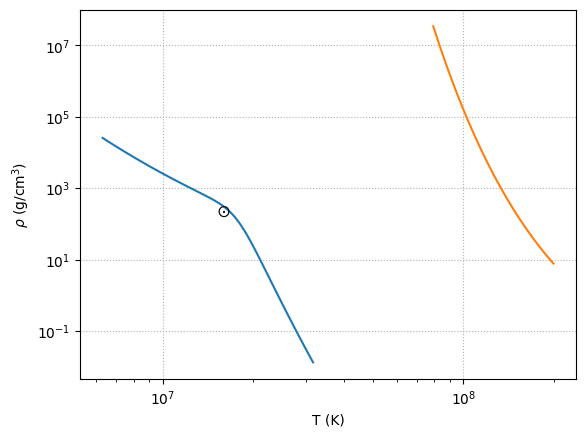

In [8]:
fig, ax = plt.subplots()
ax.loglog(T_H, rho_H)
ax.loglog(T_He, rho_He)
ax.text(T_sun, rho_sun, r"$\odot$", fontsize="large")
ax.set_xlabel(r"T (K)")
ax.set_ylabel(r"$\rho$ (g/cm$^3$)")
ax.grid(ls=":")

Note that our ignition curves are approximate, so the position of the Sun here is not quite past the H ignition curve.  This is because our value for $q_\mathrm{min}$ is probably too high for H burning.